In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [26]:
df = pd.read_excel('/content/Datasets _ NLP based tagging solution078466f.xlsx',sheet_name='Training Data ')
df.head()


,Exception (input),Queue,Process,Exception Category (ouput)
0,Invite not found in both CBS mailbox,Queue-12,Process-9,Business Exception
1,Interviewer xxxx mail ID not found in invite.,Queue-12,Process-9,Business Exception
2,Invite not found in both TAX and PAS mailbox,Queue-12,Process-9,Business Exception
3,InternalFailed to evaluate expression 'Replace...,Queue-14,Process-11,System Exception
4,Could not execute code stage because exception...,Queue-16,Process-13,System Exception


In [27]:
df.columns

Index(['Exception (input)', 'Queue', 'Process', 'Exception Category (ouput)'], dtype='object')

In [28]:
df = df.rename(columns={'Exception (input)': 'input', 'Queue':'queue', 'Process': 'process', 'Exception Category (ouput)':'output'})
df.head()

,input,queue,process,output
0,Invite not found in both CBS mailbox,Queue-12,Process-9,Business Exception
1,Interviewer xxxx mail ID not found in invite.,Queue-12,Process-9,Business Exception
2,Invite not found in both TAX and PAS mailbox,Queue-12,Process-9,Business Exception
3,InternalFailed to evaluate expression 'Replace...,Queue-14,Process-11,System Exception
4,Could not execute code stage because exception...,Queue-16,Process-13,System Exception


In [38]:
#preprocessing steps

def clean_text(text, flg_stemm = False, flg_lemm = True):
    """
    Applies some pre-processing on the given text.

    Steps :
    - Removing punctuation
    - Lowering text
    """
    
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)  
    text = re.sub(r'[0-9]','', text)  
    
    # convert text to lowercase
    text = text.strip().lower()
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    lst_stopwords = nltk.corpus.stopwords.words('english').remove('not')
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in lst_stopwords]

    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [39]:
clean_text(df['input'].iloc[0])

'invite not found in both cbs mailbox'

In [40]:
df['cleaned'] = df.input.apply(lambda x:clean_text(x))

In [41]:
df.head()

,input,queue,process,output,cleaned
0,Invite not found in both CBS mailbox,Queue-12,Process-9,Business Exception,invite not found in both cbs mailbox
1,Interviewer xxxx mail ID not found in invite.,Queue-12,Process-9,Business Exception,interviewer xxxx mail id not found in invite
2,Invite not found in both TAX and PAS mailbox,Queue-12,Process-9,Business Exception,invite not found in both tax and pa mailbox
3,InternalFailed to evaluate expression 'Replace...,Queue-14,Process-11,System Exception,internalfailed to evaluate expression replace ...
4,Could not execute code stage because exception...,Queue-16,Process-13,System Exception,could not execute code stage because exception...


In [42]:
df.cleaned.iloc[36]

'could not execute code stage because exception thrown by code stage exception from hresult xac'

In [43]:
corpus = df.cleaned

In [49]:
import gensim
import gensim.downloader as gensim_api
from sklearn.model_selection import train_test_split

In [50]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [56]:
corpus = df_train.cleaned

lst_corpus = []

for string in corpus: 
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
    lst_corpus.append(lst_grams)

len(lst_corpus)

37

In [95]:
bigrams_detector = gensim.models.phrases.Phrases(lst_corpus,delimiter=" ".encode(), min_count=5, threshold=10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus], delimiter=" ".encode(), min_count=5, threshold=10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

In [96]:
len(lst_corpus)

37

In [99]:
# list(trigrams_detector[lst_corpus])

In [75]:
nlp = gensim.models.word2vec.Word2Vec(lst_corpus, size=300, window=8, min_count=1, sg=1, iter=30)

In [77]:
nlp['found'].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(300,)

In [78]:
from tensorflow.keras import models, layers, preprocessing

In [80]:
tokenizer = preprocessing.text.Tokenizer(split = ' ')
tokenizer.fit_on_texts(lst_corpus)

In [82]:
dic_vocab = tokenizer.word_index
dic_vocab

{'access': 145,
 'accessdenied': 147,
 'accessing': 107,
 'after': 183,
 'already': 152,
 'an': 51,
 'and': 62,
 'any': 135,
 'apac': 137,
 'application': 88,
 'applicationmanager': 197,
 'article': 64,
 'assurance': 116,
 'at': 58,
 'automatically': 173,
 'bank': 166,
 'bbc': 28,
 'be': 23,
 'because': 27,
 'been': 169,
 'block': 168,
 'blueprism': 196,
 'bot': 114,
 'both': 79,
 'by': 12,
 'c': 126,
 'call': 90,
 'callee': 172,
 'cbs': 159,
 'clear': 140,
 'click': 60,
 'client': 178,
 'clshtmldocument': 199,
 'code': 8,
 'coding': 167,
 'collection': 76,
 'contain': 77,
 'contains': 117,
 'control': 128,
 'could': 20,
 'country': 138,
 'created': 155,
 'creating': 103,
 'data': 13,
 'denied': 146,
 'desc': 142,
 'dictionary': 163,
 'disconnected': 99,
 'doe': 53,
 'due': 42,
 'e': 36,
 'element': 205,
 'email': 67,
 'end': 176,
 'entry': 59,
 'error': 18,
 'evaluate': 122,
 'exception': 3,
 'execscript': 194,
 'execute': 26,
 'expression': 123,
 'ey': 164,
 'failed': 6,
 'failure': 

In [91]:
## create sequence
lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)

## padding sequence
X_train = preprocessing.sequence.pad_sequences(lst_text2seq, maxlen=15, padding="post", truncating="post")

In [92]:
import seaborn as sns

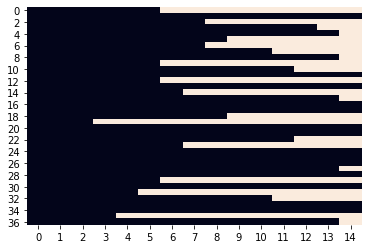

In [93]:
sns.heatmap(X_train==0, vmin=0, vmax=1, cbar=False)
plt.show()

In [101]:
embeddings = np.zeros((len(dic_vocab)+1, 300))

for word, idx in dic_vocab.items():
    embeddings[idx] = nlp[word]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [104]:
embeddings.shape

(216, 300)

## Now Creating Deep Learning Model: 

In [105]:
# attention layer
def attention_layer(inputs, neurons):
    x = layers.Permute((2,1))(inputs)
    x = layers.Dense(neurons, activation="softmax")(x)
    x = layers.Permute((2,1), name="attention")(x)
    x = layers.multiply([inputs, x])
    return x


In [118]:
x_in = layers.Input(shape = (15,))

x = layers.Embedding(input_dim=embeddings.shape[0],
                     output_dim = embeddings.shape[1],
                     weights = [embeddings],
                     input_length = 15, trainable = False) (x_in)

x = attention_layer(x, neurons=15)

x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.2, 
                         return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.2))(x)

x = layers.Dense(64, activation='relu')(x)
y_out = layers.Dense(2, activation='softmax')(x)

model = models.Model(x_in, y_out)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 15, 300)      64800       input_2[0][0]                    
__________________________________________________________________________________________________
permute_1 (Permute)             (None, 300, 15)      0           embedding_1[0][0]                
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 300, 15)      240         permute_1[0][0]                  
____________________________________________________________________________________________

In [119]:
y_train = df_train.output

In [120]:
dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array([inverse_dic[y] for y in y_train])## train
training = model.fit(x=X_train, y=y_train, epochs=10, shuffle=True, verbose=0, validation_split=0.3)

In [121]:
corpus = df_test["cleaned"]
## create list of n-grams
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus.append(lst_grams)
    ## detect common bigrams and trigrams using the fitted detectors
lst_corpus = list(bigrams_detector[lst_corpus])
lst_corpus = list(trigrams_detector[lst_corpus])
## text to sequence with the fitted tokenizer
lst_text2seq = tokenizer.texts_to_sequences(lst_corpus)
## padding sequence
X_test = preprocessing.sequence.pad_sequences(lst_text2seq, maxlen=15,
             padding="post", truncating="post")

In [122]:
predicted_prob = model.predict(X_test)
predicted = [dic_y_mapping[np.argmax(pred)] for pred in 
             predicted_prob]

In [123]:
predicted_prob

array([[0.52917796, 0.47082207],
       [0.52535236, 0.47464764],
       [0.53412646, 0.46587354],
       [0.52260596, 0.4773941 ],
       [0.5374412 , 0.46255875],
       [0.52466923, 0.4753307 ],
       [0.53306514, 0.46693483],
       [0.5331026 , 0.46689737],
       [0.53711593, 0.462884  ],
       [0.5172368 , 0.48276323]], dtype=float32)

In [ ]:
predicted

In [124]:
df_test.output

15      System Exception
37      System Exception
17    Business Exception
44      System Exception
6       System Exception
45      System Exception
5     Business Exception
20      System Exception
13    Business Exception
26      System Exception
Name: output, dtype: object